# TP5

## Constantes et modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import readAngles, readSinogram, saveImage
from reconstruction_copie import laminogram, backproject

## Question 1

Dans un but de reconstruction tomographique, on peut modéliser l'atténuation du rayonnement qui passe à travers un objet par la loi de Beer-Lambert:
$$I = I_0e^{-\int\mu(x)\text{d}x}$$
Sous forme discrétisée, on a:
$$I = I_0e^{-\sum\mu(x)\Delta x}$$
où $I$  est l'intensité détectée, $I_0$ est l'intensité initiale, $\mu$ est le coefficient d'atténuation linéaire et $x$ est la distance traversée par les rayons. Sous forme linéaire, on a:
$$\ln\bigg(\frac{I_0}{I}\bigg) = \sum\mu(x)\Delta x$$
Pour simplifier le problème, on peut considérer le corps humain comme étant composé d'eau pure. On peut alors déterminer la fraction du signal qui traverse le corps humain en utilisant le coefficient $\mu$ de l'eau. Selon les données XCOM du NIST [1], En considérant des photons ayant une énergie initiale de 60 keV, l'atténuation dans l'eau est de $2,059\times10^{-1}\ \text{cm}^2/g$. Pour une masse volumique de $1\ \text{g/cm}^3$, on obtient le paramètre $\mu(x)$ suivant:
$$\mu(x) = 2,059\times10^{-1}\ \text{cm}^2/g \times 1\ \text{g/cm}^3 = 2,059\times10^{-1}\ \text{cm}^{-1}$$
On peut alors déterminer la fraction du signal qui va être mesurée après avoir parcouru une distance donnée dans l'eau. Pour une distance de 5 cm, on a
$$\frac{I}{I_0} = e^{-\int \mu(x)\\text{d}x}$$
$$\frac{I}{I_0} = e^{-\int_0^5 2,059\times10^{-1}\text{d}x}$$
$$\frac{I}{I_0} = 0,3572$$
On observera donc 35,8 % de l'intensité du faisceau incident pour une distance de 5 cm dans l'eau (ou le corps humain). Pour une distance de 20 cm, on a:
$$\frac{I}{I_0} = e^{-\int_0^20 2,059\times10^{-1}\text{d}x}$$
$$\frac{I}{I_0} = 0,0163$$
On mesurera donc 1,63 % de l'intensité du faisceau initial pour une distance de 20 cm parcourue dans l'eau.

$$\textcolor{red}{\text{VÉRIFIER LES RÉPONSES AVEC D'AUTRES GROS CERVOS}}$$

## Question 2

On veut maintenant développer une méthode de reconstruction toomographique afin de pouvoir reconstruire des images de tomodensitométrie. Le fichier *sinogram-patient.txt* correspond au sinogramme d'une image de tomodensitométrie qu'on souhaite reconstruire. Le fichier *sinogram-password.txt* contient le sinogramme d'un mot de passe qui permet d'accéder à l'image contenue dans *sinogram-patient.txt*, fournie à des fins de comparaisons avec les résultats obtenus.

Pour effectuer la reconstruction, on utilise la rétroprojection, qui consiste à *étaler* chaque pixel de chaque projection sur la trajectoire dont il mesure l'absorption. On utilise ensuite une approche *voxel-driven* pour déterminer, pour chaque voxel, la contribution de chaque projection sur le voxel. On doit donc calculer, pour chaque orientation, quelle trajectoire passe le plus près du voxel d'intérêt. Pour ce faire, il est pratique d'exprimer la position de chaque pixel en coordonnées polaires avec l'origine au centre de l'image. On obtient alors la situation représentée à la figure 1. La quantité qui nous intéresse ici est la distance $d$ pour chaque projection avec une orientation $\theta$, car celle-ci nous renseigne sur la position du pixel qui mesure l'absorption du voxel. Un fois que nous connaissons la position du bon pixel, on peut simplement additionner la valeur de celui-ci au voxel. On répéte ensuite l'opération pour chaque orientation et éventuellement pour chaque voxel afin de recréer l'image.

$$\textcolor{red}{\text{AJOUTER LA FIGURE 1 AVEC LE SCHÉMA DES ANGLES}}$$

La reconstruction par rétroprojection est implémentée dans la fonction *laminogram* du fichier *reconstruction.py*. Les constantes utilisées par la méthode, comme la taille et le nombre des pixels et des voxels, ainsi que les noms des fichiers de données sont définis dans le fichier *geometry.py*. Des méthodes générales utilisées dans *reconstruction.py* sont définies dans le fichier *util.py*.

La fonction *laminogram* ne prend aucun argument, mais utilise les données fournies par *readInput*, une fonction définie dans *reconstruction.py* qui extrait les données à partir des fichiers de données en format *.txt*. Elle effectue ensuite le processus itératif de l'approche *voxel-driven*. Tout d'abord, la position du voxel d'intérêt en coordonnées cartésiennes est déterminée à partir des indices de celui-ci et des constantes définies dans *geometry.py*. On effectue ensuite le changement de coordonnées afin d'avoir la position du pixel en coordonnées polaires. On détermine ensuite la distance $d$ à partir de la position en coordonnées polaires et de l'orientation de la projection. En arrondissant, on obtient l'indice correspondant au bon pixel. On additionne sa valeur au voxel et on répète le processus pour toutes les projections. En répétant ce processus pour tous les voxels, on obtient la reconstruction tomographique du sinogramme.

La reconstruction du sinogramme du mot de passe correspond à *mdp_laminogram.png* et on voit que le mot de passe est *Z8HA9*. On effectue ensuite la reconstruction de l'image médicale.

nbprj: 720
angles min and max (rad):
[0.008726646259971648, 6.283185307179586]
working on image column: 1/96
working on image column: 2/96
working on image column: 3/96
working on image column: 4/96
working on image column: 5/96
working on image column: 6/96
working on image column: 7/96
working on image column: 8/96
working on image column: 9/96
working on image column: 10/96
working on image column: 11/96
working on image column: 12/96
working on image column: 13/96
working on image column: 14/96
working on image column: 15/96
working on image column: 16/96
working on image column: 17/96
working on image column: 18/96
working on image column: 19/96
working on image column: 20/96
working on image column: 21/96
working on image column: 22/96
working on image column: 23/96
working on image column: 24/96
working on image column: 25/96
working on image column: 26/96
working on image column: 27/96
working on image column: 28/96
working on image column: 29/96
working on image column: 30/96


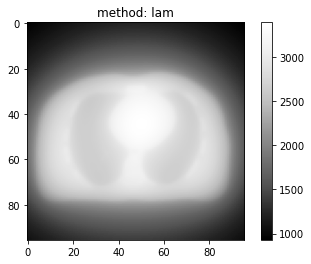

In [2]:
laminogram()

L'image médicale reconstruite est enregistrée comme *patient_laminogram.png*. On peut maintenant comparer la reconstruction avec l'image de référence présentée à la figure 2.

<center><img src="patient_ref.png" style="width: 220px;"/></center>
<center>Figure 2. Image de référence du sinogramme du patient

Le constraste de l'image reconstruite n'est pas aussi bon que celui de l'image de référence. Sur la reconstruction, une sorte de flou lumineux qui empêche de bien distinguer les éléments présents. Les contours sont beaucoup mieux définis et beaucoup plus faciles à observer sur l'image de référence. Certaines structures, comme les petits corps blancs autour de ce qui semble être les poumons, ne peuvent pas être observées sur la reconstruction. La différence entre les tons de gris des différentes parties de l'image est également moins prononcée sur la reconstruction, ce qui nuit aussi à la qualité de l'image.

## Question 3

nbprj: 720
angles min and max (rad):
[0.008726646259971648, 6.283185307179586]


c:\Users\benja\OneDrive\Documents\ULaval\Physique numérique\Git_repository\PhysNum\TP5\CTfiltre.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  sinogram[i] = filterLine(sinogram[i])


working on image column: 1/96
working on image column: 2/96
working on image column: 3/96
working on image column: 4/96
working on image column: 5/96
working on image column: 6/96
working on image column: 7/96
working on image column: 8/96
working on image column: 9/96
working on image column: 10/96
working on image column: 11/96
working on image column: 12/96
working on image column: 13/96
working on image column: 14/96
working on image column: 15/96
working on image column: 16/96
working on image column: 17/96
working on image column: 18/96
working on image column: 19/96
working on image column: 20/96
working on image column: 21/96
working on image column: 22/96
working on image column: 23/96
working on image column: 24/96
working on image column: 25/96
working on image column: 26/96
working on image column: 27/96
working on image column: 28/96
working on image column: 29/96
working on image column: 30/96
working on image column: 31/96
working on image column: 32/96
working on image 

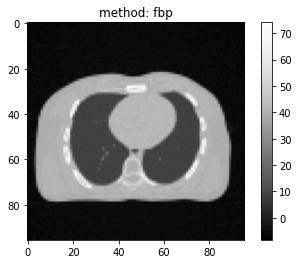

In [3]:
backproject()